In [1]:
from model import Model_FFN

/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Model_FFN(data_path='/Users/jeppegrejspetersen/Code/Final_project_AppML/era5')


In [3]:
model.load_data(sub_sampling=False)

Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,)


In [4]:
model.prepare_data_for_tensorflow(test_size=250)

X_train shape: (1577, 2, 120, 408)
y_train shape: (1577, 1)
X_test shape: (250, 2, 120, 408)
y_test shape: (250, 1)
torch.Size([1577, 2, 120, 408])
torch.Size([1577, 1])


In [5]:
best = model.optuna_trial(ntrials=1)

[I 2025-05-28 14:37:09,905] A new study created in memory with name: no-name-426db96a-37d5-4620-b73d-3adb3307f499
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 256] which is of type list.
  warnings.warn(message)
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 512, 256] which is of type list.
  warnings.warn(message)
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persis

Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FFNN                                     [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 4096]                 401,084,416
│    └─BatchNorm1d: 2-2                  [1, 4096]                 8,192
│    └─ELU: 2-3                          [1, 4096]                 --
│    └─Dropout: 2-4                      [1, 4096]                 --
│    └─Linear: 2-5                       [1, 4096]                 16,781,312
│    └─BatchNorm1d: 2-6                  [1, 4096]                 8,192
│    └─ELU: 2-7                          [1, 4096]                 --
│    └─Dropout: 2-8                      [1, 4096]                 --
│    └─Linear: 2-9                       [1, 2048]                 8,390,656
│    └─BatchNorm1d:

[W 2025-05-28 14:39:47,311] Trial 0 failed with parameters: {'hidden_dims': [4096, 4096, 2048, 1024, 512, 256, 128], 'dropout_rate': 0.29247984846949104, 'learning_rate': 2.6107363646769997e-05, 'weight_decay': 2.9443864864259523e-05, 'output_activation': 'sigmoid'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/Users/jeppegrejspetersen/Code/Final_project_AppML/LRP_ERA5_fork/jeppe/model.py", line 410, in objective
    self.train_model(
  File "/Users/jeppegrejspetersen/Code/Final_project_AppML/LRP_ERA5_fork/jeppe/model.py", line 315, in train_model
    optimizer.step()
  File "/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/torch/optim/optimizer.py", line 485, in wrapper
    out = func(*args, **kwargs)
  Fi

KeyboardInterrupt: 

In [ ]:
best.params

{'hidden_dims': [512, 256, 128, 64],
 'dropout_rate': 0.3322101849212041,
 'learning_rate': 0.00022922593860214861,
 'weight_decay': 0.0001604235921986387,
 'output_activation': 'sigmoid'}

In [ ]:
best.value

0.028749898076057434

In [ ]:
{'hidden_dims': [4096, 2048, 1024],
 'dropout_rate': 0.027404862649290818,
 'learning_rate': 4.970998945318672e-05,
 'weight_decay': 7.463563898187827e-05,
 'output_activation': 'none'}

In [13]:
model.build_model(dropout_rate=0.3322101849212041, hidden_dims=[512, 256, 128, 64], Sigmoid_output=True) 
model.train_model(learning_rate=0.00022922593860214861, weight_decay=0.0001604235921986387, epochs=1000, batch_size=64)

Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FFNN                                     [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 512]                  3,133,952
│    └─BatchNorm1d: 2-2                  [1, 512]                  1,024
│    └─ELU: 2-3                          [1, 512]                  --
│    └─Dropout: 2-4                      [1, 512]                  --
│    └─Linear: 2-5                       [1, 256]                  131,328
│    └─BatchNorm1d: 2-6                  [1, 256]                  512
│    └─ELU: 2-7                          [1, 256]                  --
│    └─Dropout: 2-8                      [1, 256]                  --
│    └─Linear: 2-9                       [1, 128]                  32,896
│    └─BatchNorm1d: 2-10     

np.float32(0.027680935)

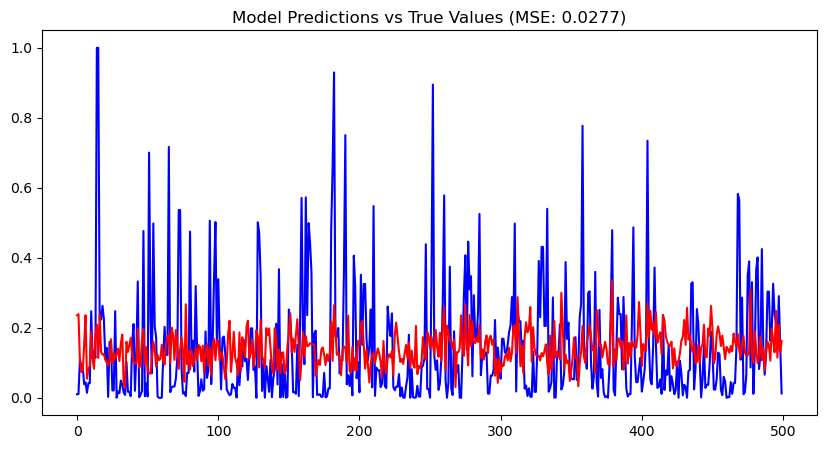

In [14]:
model.plot_model_on_test()